In [108]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [4]:
zf = ZipFile("../../Data/sim_sact_regimen.zip")
csv = zf.open("sim_sact_regimen.csv")
sim_sact_regimen = pd.read_csv(csv, encoding = 'latin1')
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE


In [5]:
sim_sact_regimen.shape

(471919, 12)

In [6]:
sim_sact_regimen.isna().sum()

MERGED_REGIMEN_ID                  0
MERGED_TUMOUR_ID                   0
HEIGHT_AT_START_OF_REGIMEN    129514
WEIGHT_AT_START_OF_REGIMEN    129341
INTENT_OF_TREATMENT            62503
DATE_DECISION_TO_TREAT         60416
START_DATE_OF_REGIMEN              0
MAPPED_REGIMEN                  2371
CLINICAL_TRIAL                 61941
CHEMO_RADIATION               103648
MERGED_PATIENT_ID                  0
BENCHMARK_GROUP                    0
dtype: int64

In [7]:
sim_sact_regimen.dtypes

MERGED_REGIMEN_ID               int64
MERGED_TUMOUR_ID                int64
HEIGHT_AT_START_OF_REGIMEN    float64
WEIGHT_AT_START_OF_REGIMEN    float64
INTENT_OF_TREATMENT            object
DATE_DECISION_TO_TREAT         object
START_DATE_OF_REGIMEN          object
MAPPED_REGIMEN                 object
CLINICAL_TRIAL                 object
CHEMO_RADIATION                object
MERGED_PATIENT_ID               int64
BENCHMARK_GROUP                object
dtype: object

In [8]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 1].count()

MERGED_REGIMEN_ID             81706
MERGED_TUMOUR_ID              81706
HEIGHT_AT_START_OF_REGIMEN    57203
WEIGHT_AT_START_OF_REGIMEN    57241
INTENT_OF_TREATMENT           69561
DATE_DECISION_TO_TREAT        72104
START_DATE_OF_REGIMEN         81706
MAPPED_REGIMEN                81373
CLINICAL_TRIAL                71271
CHEMO_RADIATION               64349
MERGED_PATIENT_ID             81706
BENCHMARK_GROUP               81706
dtype: int64

In [9]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') > 1].count()

MERGED_REGIMEN_ID             390213
MERGED_TUMOUR_ID              390213
HEIGHT_AT_START_OF_REGIMEN    285202
WEIGHT_AT_START_OF_REGIMEN    285337
INTENT_OF_TREATMENT           339855
DATE_DECISION_TO_TREAT        339399
START_DATE_OF_REGIMEN         390213
MAPPED_REGIMEN                388175
CLINICAL_TRIAL                338707
CHEMO_RADIATION               303922
MERGED_PATIENT_ID             390213
BENCHMARK_GROUP               390213
dtype: int64

In [10]:
print("The original dataset has data for %d patients" % len(sim_sact_regimen))
print("After removing duplicates, the dataset has data for %d patients" % len(sim_sact_regimen.drop_duplicates()))
print("There are no duplicates in the dataset")

The original dataset has data for 471919 patients
After removing duplicates, the dataset has data for 471919 patients
There are no duplicates in the dataset


In [11]:
sim_sact_regimen.columns

Index(['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT',
       'DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN', 'MAPPED_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID',
       'BENCHMARK_GROUP'],
      dtype='object')

In [12]:
columns_selected = ['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT', 'START_DATE_OF_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID',
       'BENCHMARK_GROUP']

In [13]:
sim_sact_regimen = sim_sact_regimen[columns_selected]
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-10,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-23,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2013-03-11,N,N,10000533,HYDROXYCARBAMIDE


In [14]:
df = pd.read_pickle("./Data/avpat_avtum_sactpat_sacttum.pickle")
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID,LINK_NUMBER,MERGED_TUMOUR_ID
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0


In [15]:
df.shape

(38485, 67)

In [16]:
# df = df.merge(sim_sact_regimen, left_on = 'MERGED_TUMOUR_ID', right_on = 'MERGED_TUMOUR_ID', how = 'inner')
# df.head()

In [17]:
df = df.merge(sim_sact_regimen, left_on = 'MERGED_TUMOUR_ID', right_on = 'MERGED_TUMOUR_ID', how = 'left')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,NaN,65.5,NaN,2013-03-19,N,NaN,10001000.0,TRIAL
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,1.80,70.0,NaN,2015-09-26,02,N,10001000.0,NOT CHEMO
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,NaN,75.3,P,2015-11-23,02,NaN,10001482.0,BORTEZOMIB
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,1.56,NaN,NaN,2014-07-18,N,NaN,10001482.0,DOCETAXEL


In [18]:
df.shape

(45415, 76)

In [19]:
df['HEIGHT_AT_START_OF_REGIMEN'].describe()

count    15231.000000
mean         1.626701
std          0.337132
min         -1.000000
25%          1.600000
50%          1.680000
75%          1.750000
max          2.100000
Name: HEIGHT_AT_START_OF_REGIMEN, dtype: float64

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


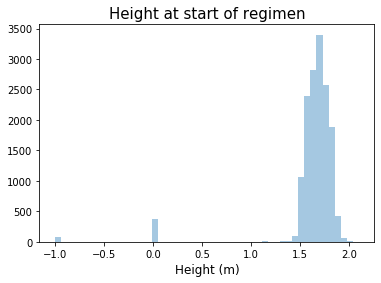

In [20]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
ax.set_title('Height at start of regimen', fontsize=15)
ax.set_xlabel('Height (m)', fontsize=12);

In [21]:
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([  nan,  1.8 ,  1.56,  1.78,  1.63,  1.57,  1.77,  1.65,  1.87,
        0.  , -1.  ,  1.73,  1.59,  1.68,  1.52,  1.6 ,  1.69,  1.74,
        1.83,  1.55,  1.71,  1.84,  1.7 ,  1.53,  1.67,  1.75,  1.61,
        1.72,  1.5 ,  1.48,  1.76,  1.64,  1.58,  1.66,  1.51,  1.49,
        1.85,  1.46,  1.79,  1.62,  1.82,  1.81,  1.54,  1.44,  1.86,
        1.45,  0.79,  1.88,  0.01,  1.47,  1.9 ,  0.02,  1.92,  1.91,
        1.93,  0.65,  1.89,  1.4 ,  1.31,  1.43,  0.61,  1.42,  1.94,
        1.15,  0.73,  1.98,  1.41,  2.  ,  1.95,  1.96,  0.74,  1.1 ,
        0.7 ,  1.16,  1.04,  2.04,  0.8 ,  2.1 ,  1.13,  0.48])

In [22]:
def height(value):
    if value < 0.7:
        return np.nan
    else:
        return value
df['HEIGHT_AT_START_OF_REGIMEN'] = df['HEIGHT_AT_START_OF_REGIMEN'].apply(height)    
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([ nan, 1.8 , 1.56, 1.78, 1.63, 1.57, 1.77, 1.65, 1.87, 1.73, 1.59,
       1.68, 1.52, 1.6 , 1.69, 1.74, 1.83, 1.55, 1.71, 1.84, 1.7 , 1.53,
       1.67, 1.75, 1.61, 1.72, 1.5 , 1.48, 1.76, 1.64, 1.58, 1.66, 1.51,
       1.49, 1.85, 1.46, 1.79, 1.62, 1.82, 1.81, 1.54, 1.44, 1.86, 1.45,
       0.79, 1.88, 1.47, 1.9 , 1.92, 1.91, 1.93, 1.89, 1.4 , 1.31, 1.43,
       1.42, 1.94, 1.15, 0.73, 1.98, 1.41, 2.  , 1.95, 1.96, 0.74, 1.1 ,
       0.7 , 1.16, 1.04, 2.04, 0.8 , 2.1 , 1.13])

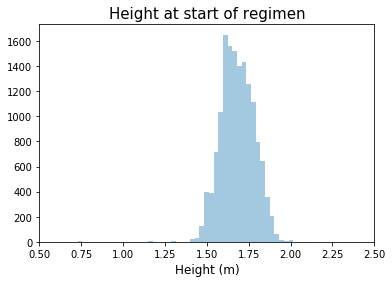

In [23]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
ax.set_title('Height at start of regimen', fontsize=15)
ax.set_xlabel('Height (m)', fontsize=12)
plt.xlim(0.5,2.5);

In [24]:
df['HEIGHT'] = df.groupby('PATIENTID')['HEIGHT_AT_START_OF_REGIMEN'].transform(lambda x: x.median())

In [25]:
df[['PATIENTID','HEIGHT_AT_START_OF_REGIMEN','HEIGHT']].sort_values(by = 'PATIENTID', ascending = False).head(50)

,PATIENTID,HEIGHT_AT_START_OF_REGIMEN,HEIGHT
33935,220045649,NaN,NaN
33934,220045089,NaN,NaN
33933,220045082,NaN,NaN
33932,220043390,NaN,1.820
33931,220043390,1.82,1.820
33930,220043390,NaN,1.820
33929,220043390,NaN,1.820
33928,220043175,NaN,NaN
33927,220041276,1.80,1.750
33926,220041276,1.75,1.750


In [26]:
df['HEIGHT'].describe()

count    18210.000000
mean         1.682314
std          0.072519
min          1.210000
25%          1.635000
50%          1.680000
75%          1.730000
max          2.040000
Name: HEIGHT, dtype: float64

In [27]:
df['HEIGHT'] = df['HEIGHT'].fillna(df['HEIGHT'].median())
df['HEIGHT'].describe()

count    45415.000000
mean         1.680928
std          0.045934
min          1.210000
25%          1.680000
50%          1.680000
75%          1.680000
max          2.040000
Name: HEIGHT, dtype: float64

In [28]:
df['HEIGHT'].isna().sum()

0

In [29]:
df['WEIGHT_AT_START_OF_REGIMEN'].describe()

count    14895.000000
mean        73.587582
std         19.844696
min         -1.000000
25%         62.300000
50%         73.200000
75%         84.625000
max        217.400000
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

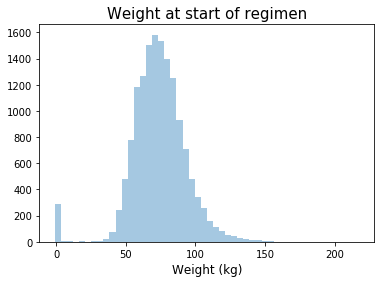

In [30]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
ax.set_title('Weight at start of regimen', fontsize=15)
ax.set_xlabel('Weight (kg)', fontsize=12);

In [31]:
def weight(value):
    if value < 10 or value >= 350:
        return np.nan
    else:
        return value
df['WEIGHT_AT_START_OF_REGIMEN'] = df['WEIGHT_AT_START_OF_REGIMEN'].apply(weight)    
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values(ascending = False).head(20)

16043    217.4
37771    217.4
12543    204.8
25632    181.7
31191    178.0
18310    178.0
24598    161.5
5698     161.5
21931    157.0
16869    157.0
38899    156.0
19488    156.0
36639    154.0
12353    151.0
36099    148.8
28891    148.8
2891     148.8
21402    148.8
40973    148.0
22315    148.0
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

In [32]:
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values().head(20)

32874    13.30
33799    17.00
45356    17.60
1099     20.00
32745    27.10
31402    27.30
32395    27.30
31591    27.30
23014    27.30
32740    28.10
32675    32.75
30931    32.80
44530    32.80
13070    33.30
29908    34.30
40338    34.40
19818    34.40
4344     34.60
39193    34.70
10833    34.80
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

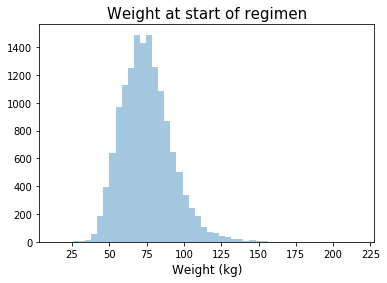

In [33]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
ax.set_title('Weight at start of regimen', fontsize=15)
ax.set_xlabel('Weight (kg)', fontsize=12);

In [34]:
df['WEIGHT'] = df.groupby('PATIENTID')['WEIGHT_AT_START_OF_REGIMEN'].transform(lambda x: x.median())

In [35]:
df[['PATIENTID','WEIGHT_AT_START_OF_REGIMEN','WEIGHT']].sort_values(by = 'PATIENTID', ascending = False).head(50)

,PATIENTID,WEIGHT_AT_START_OF_REGIMEN,WEIGHT
33935,220045649,NaN,NaN
33934,220045089,NaN,NaN
33933,220045082,NaN,NaN
33932,220043390,55.0,70.00
33931,220043390,83.0,70.00
33930,220043390,84.1,70.00
33929,220043390,57.0,70.00
33928,220043175,NaN,NaN
33927,220041276,78.0,73.25
33926,220041276,NaN,73.25


In [36]:
df['WEIGHT'].describe()

count    18166.000000
mean        74.617003
std         12.128821
min         33.300000
25%         66.850000
50%         74.000000
75%         81.250000
max        157.000000
Name: WEIGHT, dtype: float64

In [37]:
df['WEIGHT'] = df['WEIGHT'].fillna(df['WEIGHT'].median())
df['WEIGHT'].describe()

count    45415.000000
mean        74.246801
std          7.676767
min         33.300000
25%         74.000000
50%         74.000000
75%         74.000000
max        157.000000
Name: WEIGHT, dtype: float64

In [38]:
df['WEIGHT'].isna().sum()

0

In [39]:
df['BMI'] = df.WEIGHT / ((df.HEIGHT) ** 2)
df[['PATIENTID', 'WEIGHT', 'HEIGHT', 'BMI']].head(10)

,PATIENTID,WEIGHT,HEIGHT,BMI
0,10001000,67.75,1.80,20.910494
1,10001000,67.75,1.80,20.910494
2,10001128,74.00,1.68,26.218821
3,10001482,90.15,1.63,33.930521
4,10001482,90.15,1.63,33.930521
5,10001482,90.15,1.63,33.930521
6,10001482,90.15,1.63,33.930521
7,10001901,74.00,1.68,26.218821
8,10002351,74.00,1.68,26.218821
9,10002391,74.00,1.68,26.218821


In [40]:
df['BMI'].describe()

count    45415.000000
mean        26.313575
std          2.900986
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [41]:
df['BMI'].sort_values(ascending=False).head(20)

16044    62.180424
16043    62.180424
40593    56.712963
18298    54.421769
37771    53.669691
37774    53.669691
37773    53.669691
37772    53.669691
37770    53.669691
35950    52.171107
16869    51.856256
14130    51.704973
2890     51.487889
2891     51.487889
44995    50.131492
43266    49.609375
26792    49.216479
6873     49.142574
32278    48.425654
32277    48.425654
Name: BMI, dtype: float64

In [42]:
df['BMI'].sort_values().head(20)

10833    10.563941
10832    10.563941
13070    11.940191
32104    12.000000
32105    12.000000
2205     12.332128
32410    13.180272
19728    13.192779
24987    13.487020
42666    13.580247
42665    13.580247
31710    13.747166
33031    13.878744
45149    13.924320
10907    13.981481
10905    13.981481
10908    13.981481
10906    13.981481
43146    14.044496
32158    14.325069
Name: BMI, dtype: float64

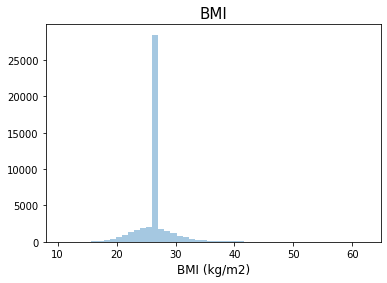

In [43]:
ax = sns.distplot(df['BMI'], hist = True, kde = False, bins = 50)
ax.set_title('BMI', fontsize=15)
ax.set_xlabel('BMI (kg/m2)', fontsize=12);

In [44]:
def bmi(value):
    if value < 10 or value > 70:
        return np.nan
    else:
        return value
df['BMI'] = df['BMI'].apply(bmi)    
df['BMI'].sort_values(ascending = False).head(20)

16044    62.180424
16043    62.180424
40593    56.712963
18298    54.421769
37771    53.669691
37774    53.669691
37773    53.669691
37772    53.669691
37770    53.669691
35950    52.171107
16869    51.856256
14130    51.704973
2890     51.487889
2891     51.487889
44995    50.131492
43266    49.609375
26792    49.216479
6873     49.142574
32278    48.425654
32277    48.425654
Name: BMI, dtype: float64

In [45]:
df['BMI'].sort_values().head(20)

10833    10.563941
10832    10.563941
13070    11.940191
32104    12.000000
32105    12.000000
2205     12.332128
32410    13.180272
19728    13.192779
24987    13.487020
42666    13.580247
42665    13.580247
31710    13.747166
33031    13.878744
45149    13.924320
10907    13.981481
10905    13.981481
10908    13.981481
10906    13.981481
43146    14.044496
32158    14.325069
Name: BMI, dtype: float64

In [46]:
df[['PATIENTID','HEIGHT','WEIGHT','BMI']].sort_values(by='BMI',ascending=False).head(10)

,PATIENTID,HEIGHT,WEIGHT,BMI
16043,60031006,1.48,136.20,62.180424
16044,60031006,1.48,136.20,62.180424
40593,60038107,1.44,117.60,56.712963
18298,60035833,1.47,117.60,54.421769
37771,60021426,1.64,144.35,53.669691
37772,60021426,1.64,144.35,53.669691
37773,60021426,1.64,144.35,53.669691
37774,60021426,1.64,144.35,53.669691
37770,60021426,1.64,144.35,53.669691
35950,60010603,1.67,145.50,52.171107


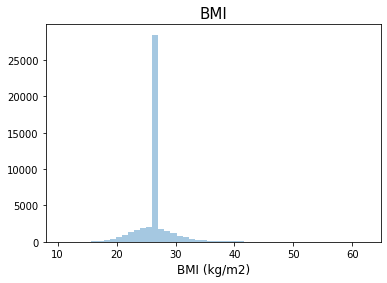

In [47]:
ax = sns.distplot(df['BMI'], hist = True, kde = False, bins = 50)
ax.set_title('BMI', fontsize=15)
ax.set_xlabel('BMI (kg/m2)', fontsize=12);

In [48]:
df['BMI'].describe()

count    45415.000000
mean        26.313575
std          2.900986
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [49]:
df['BMI'].isna().sum()

0

In [50]:
# df['BMI'] = df['BMI'].fillna(df['BMI'].median())
# df['BMI'].describe()

In [51]:
# df['BMI'].isna().sum()

In [52]:
df = df.drop(['HEIGHT_AT_START_OF_REGIMEN','WEIGHT_AT_START_OF_REGIMEN'], axis = 1)

In [53]:
df['INTENT_OF_TREATMENT'].value_counts()

P    8339
A    5380
9    1157
N     920
C     668
D     261
U      30
4      20
1      19
R       8
a       7
2       5
3       4
p       4
c       1
5       1
Name: INTENT_OF_TREATMENT, dtype: int64

In [54]:
# Source: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cancer_treatment_intent_de.asp?shownav=1
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
def intent(value):
    if value == '1' or value == 'C' or value == 'c':
        return 'Curative'
    elif value == '2' or value == 'P' or value == 'p':
        return 'Palliative'
    elif value == '3':
        return 'Disease modification'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == '5':
        return 'Staging'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == 'A' or value == 'a':
        return 'Adjuvant'
    elif value == 'N':
        return 'Neoadjuvant'
    elif value == '9' or value == 'R' or value == 'U' or value == '?' or value == 'T' or value == 'nan':
        return np.nan
    else:
        return value
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].apply(intent)    
df['INTENT_OF_TREATMENT'].value_counts()

Palliative              8348
Adjuvant                5387
Neoadjuvant              920
Curative                 688
Diagnostic               281
Disease modification       4
Staging                    1
Name: INTENT_OF_TREATMENT, dtype: int64

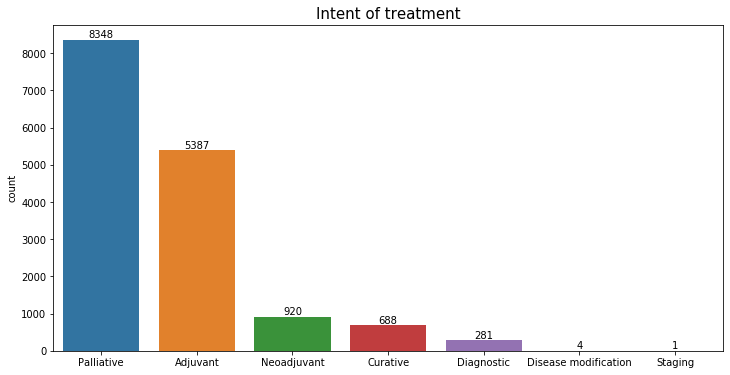

In [55]:
ax = sns.countplot(data = df, x = 'INTENT_OF_TREATMENT', order=['Palliative', 'Adjuvant','Neoadjuvant','Curative','Diagnostic',
                                                               'Disease modification','Staging'])
ax.set_title('Intent of treatment', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+60, height, ha="center")
plt.gcf().set_size_inches(12,6)

In [56]:
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
df['NEOADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Neoadjuvant' in tumour for tumour in patient) else False)
df['DIAGNOSTIC'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Diagnostic' in tumour for tumour in patient) else False)
df['PALLIATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Palliative' in tumour for tumour in patient) else False)
df['CURATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Curative' in tumour for tumour in patient) else False)
df['ADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Adjuvant' in tumour for tumour in patient) else False)
df['DISEASE_MOD'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Disease modification' in tumour for tumour in patient) else False)
df['STAGING'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Staging' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,False,False,False,False,False,False,False
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,02,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,False,False,False,False,False,False,False
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,1.68,74.00,26.218821,False,False,False,False,False,False,False
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,02,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,False,False,True,False,False,False,False
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,False,False,True,False,False,False,False


In [57]:
df['START_DATE_OF_REGIMEN'].sort_values().dropna().head(10)

44355    1860-03-02
44356    1860-07-30
44357    1860-08-20
27997    1860-11-05
9875     1975-06-18
9872     1975-07-02
9880     1975-12-23
9879     1975-12-31
19875    2006-03-19
19876    2006-03-19
Name: START_DATE_OF_REGIMEN, dtype: object

In [58]:
df['START_DATE_OF_REGIMEN'].sort_values(ascending = False).dropna().head(10)

25949    2018-07-23
25950    2018-07-23
26192    2018-04-03
5464     2018-03-31
524      2018-03-29
523      2018-03-27
25948    2018-03-19
27519    2018-02-08
26060    2018-02-07
34967    2018-02-01
Name: START_DATE_OF_REGIMEN, dtype: object

In [59]:
df['START_DATE_OF_REGIMEN'] = pd.to_datetime(df['START_DATE_OF_REGIMEN'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['DIAG_TO_TREAT'] = df['START_DATE_OF_REGIMEN'] - df['DIAGNOSISDATEBEST']
df['DIAG_TO_TREAT_DAYS'] = df['DIAG_TO_TREAT'] / np.timedelta64(1, 'D')
df[['START_DATE_OF_REGIMEN', 'DIAGNOSISDATEBEST', 'DIAG_TO_TREAT', 'DIAG_TO_TREAT_DAYS']].dropna().head()

,START_DATE_OF_REGIMEN,DIAGNOSISDATEBEST,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS
0,2013-03-19,2013-03-07,12 days,12.0
1,2015-09-26,2013-03-07,933 days,933.0
3,2015-11-23,2014-01-08,684 days,684.0
4,2014-07-18,2014-01-08,191 days,191.0
5,2015-08-03,2014-01-08,572 days,572.0


In [60]:
df['DIAG_TO_TREAT_DAYS'].sort_values().head(40)

44355   -56854.0
44356   -56704.0
44357   -56683.0
27997   -55655.0
9875    -14763.0
9880    -14562.0
9879    -14554.0
9872    -14397.0
19876    -2538.0
19875    -2538.0
19878    -2510.0
9112     -2391.0
18461    -2162.0
18468    -2162.0
1415     -2104.0
392      -2088.0
391      -2088.0
31390    -2003.0
31391    -1925.0
31392    -1925.0
29132    -1891.0
31393    -1825.0
29361    -1735.0
33570    -1719.0
45049    -1674.0
23566    -1638.0
616      -1576.0
22237    -1538.0
45222    -1536.0
33665    -1517.0
45078    -1472.0
34003    -1466.0
32696    -1444.0
906      -1423.0
32108    -1383.0
22233    -1364.0
369      -1363.0
9521     -1340.0
51       -1321.0
905      -1314.0
Name: DIAG_TO_TREAT_DAYS, dtype: float64

In [61]:
df['DIAG_TO_TREAT_DAYS'].sort_values(ascending=False).head(40)

25437    1551.0
25950    1491.0
25949    1491.0
26669    1478.0
29877    1476.0
33357    1452.0
42921    1451.0
25345    1450.0
43277    1430.0
19880    1412.0
32772    1408.0
19879    1405.0
29645    1403.0
30132    1401.0
9706     1386.0
13137    1386.0
19877    1384.0
25432    1383.0
29644    1382.0
13136    1379.0
27813    1376.0
25434    1365.0
25948    1365.0
7183     1360.0
7184     1360.0
26668    1346.0
35095    1346.0
26924    1344.0
19919    1339.0
23925    1339.0
31447    1330.0
27814    1326.0
23442    1320.0
32938    1314.0
9352     1313.0
11026    1312.0
40671    1312.0
30996    1312.0
32936    1307.0
26257    1305.0
Name: DIAG_TO_TREAT_DAYS, dtype: float64

In [62]:
df['DIAG_TO_TREAT_DAYS'].describe()

count    19074.000000
mean       158.155237
std        917.532999
min     -56854.000000
25%         46.000000
50%        104.000000
75%        337.000000
max       1551.000000
Name: DIAG_TO_TREAT_DAYS, dtype: float64

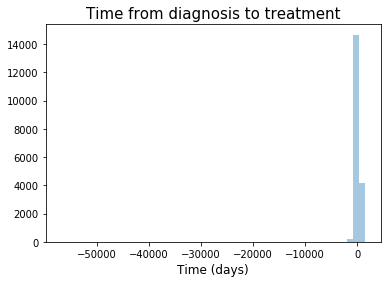

In [63]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [64]:
def diag_to_treat(value):
    if value < 0:
        return np.nan
    else:
        return value
    
df['DIAG_TO_TREAT_DAYS'] = df['DIAG_TO_TREAT_DAYS'].apply(diag_to_treat)
df['DIAG_TO_TREAT_DAYS'].describe()

count    16282.000000
mean       264.258261
std        268.579412
min          0.000000
25%         70.000000
50%        142.000000
75%        392.000000
max       1551.000000
Name: DIAG_TO_TREAT_DAYS, dtype: float64

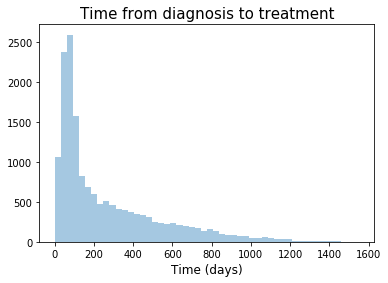

In [65]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [66]:
df['DIAG_TO_TREAT_DAYS_MEDIAN'] = df.groupby('PATIENTID')['DIAG_TO_TREAT_DAYS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,False,False,False,False,False,False,False,12 days,12.0,472.5
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,02,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,False,False,False,False,False,False,False,933 days,933.0,472.5
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaT,NaN,NaN,NaN,NaN,1.68,74.00,26.218821,False,False,False,False,False,False,False,NaT,NaN,NaN
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,02,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,False,False,True,False,False,False,False,684 days,684.0,596.5
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,False,False,True,False,False,False,False,191 days,191.0,596.5


In [67]:
df['DIAG_TO_TREAT_DAYS_MEDIAN'] = df['DIAG_TO_TREAT_DAYS_MEDIAN'].fillna(df['DIAG_TO_TREAT_DAYS_MEDIAN'].median())
df['DIAG_TO_TREAT_DAYS_MEDIAN'].describe()

count    45415.000000
mean       204.566817
std        143.075434
min          0.000000
25%        175.000000
50%        175.000000
75%        175.000000
max       1405.000000
Name: DIAG_TO_TREAT_DAYS_MEDIAN, dtype: float64

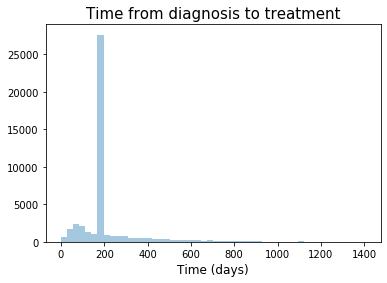

In [68]:
ax = sns.distplot(df['DIAG_TO_TREAT_DAYS_MEDIAN'], hist = True, kde = False, bins = 50)
ax.set_title('Time from diagnosis to treatment', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [69]:
df['CLINICAL_TRIAL'].value_counts()

N     10236
02     4241
2      1786
Y       372
01      152
99      100
1        67
3         6
EE        1
Name: CLINICAL_TRIAL, dtype: int64

In [70]:
# Source: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cla/clinical_trial_indicator_de.asp?shownav=1
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
def clinical_trial(value):
    if value == '1' or value == '01' or value == 'Y':
        return 'Y'
    elif value == '2' or value == '02' or value == 'N' or value == 'NO':
        return 'N'
    elif value == '99' or value == '3' or value == '0' or value == 'n' or value == 'EE' or value == 'nan':
        return np.nan
    else:
        return value
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].apply(clinical_trial)    
df['CLINICAL_TRIAL'].value_counts()

N    16263
Y      591
Name: CLINICAL_TRIAL, dtype: int64

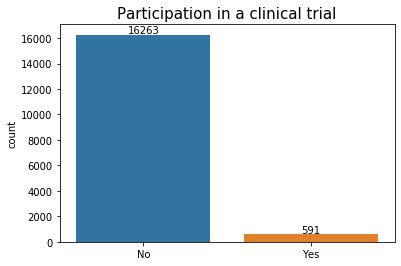

In [71]:
ax = sns.countplot(data = df, x = 'CLINICAL_TRIAL')
ax.set_title('Participation in a clinical trial', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [72]:
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
df['CT_YES'] = df.groupby('PATIENTID')['CLINICAL_TRIAL'].transform(lambda patient: True if any('Y' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,NaN,10001000.0,TRIAL,1.80,67.75,20.910494,False,False,False,False,False,False,False,12 days,12.0,472.5,False
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,N,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,False,False,False,False,False,False,False,933 days,933.0,472.5,False
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaT,nan,NaN,NaN,NaN,1.68,74.00,26.218821,False,False,False,False,False,False,False,NaT,NaN,175.0,False
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,N,NaN,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,False,False,True,False,False,False,False,684 days,684.0,596.5,False
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,NaN,10001482.0,DOCETAXEL,1.63,90.15,33.930521,False,False,True,False,False,False,False,191 days,191.0,596.5,False


In [73]:
df['CHEMO_RADIATION'].value_counts()

N    14668
Y      230
2       66
n       12
X        6
Name: CHEMO_RADIATION, dtype: int64

In [74]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
def chemo(value):
    if value == 'Y' or value == 'y':
        return 'Y'
    elif value == 'N' or value == 'n':
        return 'N'
    elif value == '2' or value == 'X' or value == 'nan':
        return np.nan
    else:
        return value
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].apply(chemo)    
df['CHEMO_RADIATION'].value_counts()

N    14680
Y      230
Name: CHEMO_RADIATION, dtype: int64

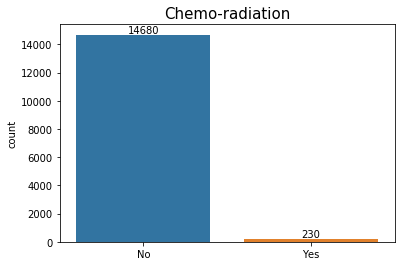

In [75]:
ax = sns.countplot(data = df, x = 'CHEMO_RADIATION')
ax.set_title('Chemo-radiation', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [76]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
df['CHEM_RAD_YES'] = df.groupby('PATIENTID')['CHEMO_RADIATION'].transform(lambda patient: True if any('Y' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,nan,10001000.0,TRIAL,1.80,67.75,20.910494,False,False,False,False,False,False,False,12 days,12.0,472.5,False,False
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,N,N,10001000.0,NOT CHEMO,1.80,67.75,20.910494,False,False,False,False,False,False,False,933 days,933.0,472.5,False,False
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaT,nan,nan,NaN,NaN,1.68,74.00,26.218821,False,False,False,False,False,False,False,NaT,NaN,175.0,False,False
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,N,nan,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,False,False,True,False,False,False,False,684 days,684.0,596.5,False,False
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,nan,10001482.0,DOCETAXEL,1.63,90.15,33.930521,False,False,True,False,False,False,False,191 days,191.0,596.5,False,False


In [77]:
df['BENCHMARK_GROUP'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

In [78]:
def chemo(value):
    if value in ['CAPECITABINE + OXALIPLATIN','OXALIPLATIN + MDG','CAPECITABINE','IRINOTECAN + MDG','FLUOROURACIL','FEC','CVD',
                 'CAPECITABINE + IRINOTECAN','AFLIBERCEPT + FU + IRINOTECAN','IRINOTECAN','OXALIPLATIN + RALTITREXED','EC','EP',
                'FOXTROT TRIAL','CARBOPLATIN + ETOPOSIDE','FLUOROURACIL + IRINOTECAN + OXALIPLATIN','RALTITREXED','EOX','ABVD',
                'CARBOPLATIN + PACLITAXEL','OXALIPLATIN','SCOT TRIAL','MITOMYCIN INTRAVESICULAR','CARBOPLATIN','DOCETAXEL','ACE',
                'CISPLATIN','CAPECITABINE + MITOMYCIN','CISPLATIN + ETOPOSIDE','GEMCARBO','CYCLOPHOSPHAMIDE + DOCETAXEL','ECX',
                'CISPLATIN + GEMCITABINE','GEMCITABINE','FEC + DOCETAXEL','AFLIBERCEPT','CISPLATIN + PEMETREXED','AML17','BEP',
                'HYDROXYCARBAMIDE','PACLITAXEL','CISPLATIN + VINORELBINE','CISPLATIN + FLUOROURACIL','CUFOX TRIAL','CHOP','CTD',
                'CARBOPLATIN + VINORELBINE','CAPECITABINE + CISPLATIN','BENDAMUSTINE','MITOMYCIN','CARBOPLATIN + PEMETREXED','AC',
                'CARBO + FLUOROURACIL','DOXORUBICIN','CHLORAMBUCIL','AZACITIDINE','EPIRUBICIN','IRINOTECAN + RALTITREXED','CMF',
                'FLUOROURACIL + MITOMYCIN','VINORELBINE','PEMETREXED','CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN','MELPHALAN',
                'CVP','DACARBAZINE','CAP','METHOTREXATE HIGH DOSE','CAPECITABINE + GEMCITABINE','CYCLOPHOSPHAMIDE HIGH DOSE','CMV',
                'CYCLOPHOSPHAMIDE','CYTARABINE HD + METHOTREXATE HD','CAPECITABINE + CARBOPLATIN','DOXORUBICIN EMBOLISATION','IVA',
                'CABAZITAXEL','TAC','AFLIBERCEPT + IRINOTECAN + OXALIPLATIN + MDG','EOF','TEMOZOLOMIDE','FOCUS4 TRIAL','DA','CAV',
                'CAPECITABINE + STREPTOZOCIN','CAPECITABINE + EPIRUBICIN + OXALIPLATIN','CLADRIBINE','ETOPOSIDE','METHOTREXATE',
                'GEMCITABINE + PACLITAXEL','NAB-PACLITAXEL','PANTHER TRIAL','CARBOPLATIN + OXALIPLATIN','CARBOPLATIN + TOPOTECAN',
                'AFLIBERCEPT + IRINOTECAN + MDG','CISPLATIN + DOXORUBICIN','METHOTREXATE INTRATHECAL','FLUDARABINE','AML16','TCF',
                'CAPECITABINE + CARBOPLATIN + EPIRUBICIN','UKALL2011','CAPECITABINE + OXALIPLATIN + MDG','TRAPEZE TRIAL','VEDEX',
                'CAPECITABINE + VINORELBINE','CISPLATIN + DOCETAXEL + FLUOROURACIL','CODOX M','FLAG + IDARUBICIN','PCV','LEAM',
                'AFLIBERCEPT + FLUOROURACIL','CYTARABINE HIGH DOSE','EC + PACLITAXEL','VINBLASTINE','CHLVPP','OEPA','IPM','FCIST',
                'CAPECITABINE + CISPLATIN + EPIRUBICIN','CARBOPLATIN + LIPOSOMAL DOX','FLUOROURACIL + STREPTOZOCIN','IVE','MIC',
                'CISPLATIN + TOPOTECAN','CARBOPLATIN + EPIRUBICIN','CAPECITABINE + IRINOTECAN + MDG','ICON TRIAL','VEPEMB','ECF',
                'CISPLATIN + DOCETAXEL','CARBOPLATIN + VINCRISTINE','GEMCITABINE + VINORELBINE','RAVVA TRIAL','ACE (GERM CELL)',
                'ATG + BUSULFAN + FLUDARABINE','TOPOTECAN','CISPLATIN + MITOMYCIN','LIPOSOMAL DOXORUBICIN','DHAP','CYTARABINE',
                'CYCLOPHOSPHAMIDE + VINCRISTINE','MITOTANE','URACIL','LOPP','TRIPLE INTRATHECAL','FAB LMB','MVP','EEX','BEAM',
                'CARBOPLATIN + METHOTREXATE + VINBLASTINE','CAPECITABINE + TEMOZOLOMIDE','CARBOPLATIN + DOXORUBICIN','SPIRIT TRIAL',
                'DOXORUBICIN + IFOSFAMIDE','MITOMYCIN + RALTITREXED','CISPLATIN + IRINOTECAN','CISPLATIN + PACLITAXEL','MVAC',
                'GEMCITABINE + NAB-PACLITAXEL','ETOPOSIDE + IFOSFAMIDE','NEOSCOPE TRIAL','CARBOPLATIN + IRINOTECAN','COUGAR TRIAL',
                'CHLORAMBUCIL + ETOPOSIDE + LOMUSTINE','IFOSFAMIDE','CYTARABINE + IDARUBICIN','CARMUSTINE + THIOTEPA']:
        return 'Chemotherapy'
    else:
        return value

df['CHEMOTHERAPY'] = df['BENCHMARK_GROUP'].apply(chemo)  
df['CHEMOTHERAPY'].value_counts()

Chemotherapy                                  14492
NOT CHEMO                                       538
BEVACIZUMAB                                     522
CETUXIMAB + IRINOTECAN + MDG                    518
BEVACIZUMAB + CAPE + OXALIPLATIN                381
CETUXIMAB                                       375
BEVACIZUMAB + OXALIPLATIN + MdG                 224
TRIAL                                           135
BEVACIZUMAB + CAPECITABINE                      127
CAPECITABINE + RT                               122
BEVACIZUMAB + IRINOTECAN + MdG                  120
HORMONES                                        117
CETUXIMAB + OXALIPLATIN + MDG                   102
CHOP R                                          100
RITUXIMAB                                        66
PANITUMUMAB                                      61
NOT MATCHED                                      60
CETUXIMAB + IRINOTECAN                           55
TRASTUZUMAB                                      52
ZOLEDRONIC A

In [79]:
# def chemo(value):
#     if value in ['FEC','DOCETAXEL','FEC + DOCETAXEL','PACLITAXEL','EC','CYCLOPHOSPHAMIDE + DOCETAXEL','CAPECITABINE','TAC',
#                'CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN','EPIRUBICIN','GEMCARBO','ERIBULIN','AC','EC + DOCETAXEL','BEP',
#                'CARBOPLATIN','NAB-PACLITAXEL','VINORELBINE','CARBOPLATIN + PACLITAXEL','CARBOPLATIN + DOCETAXEL','CMF','MMM',
#                'CYCLOPHOSPHAMIDE','EPIRUBICIN + CMF','FLUOROURACIL','CISPLATIN + GEMCITABINE','EC + PACLITAXEL','EOF','VEPEMB',
#                'CAPECITABINE + OXALIPLATIN','CARBOPLATIN + ETOPOSIDE','OXALIPLATIN + MDG','CHOP','HYDROXYCARBAMIDE','CVP','ECF',
#                'METHOTREXATE HIGH DOSE','CAPECITABINE + VINORELBINE','CARBOPLATIN + PEMETREXED','METHOTREXATE INTRATHECAL',
#                'CISPLATIN + VINORELBINE','DOXORUBICIN','GEMCITABINE + PACLITAXEL','ECX','CARBOPLATIN + VINORELBINE','CVD','LEAM',
#                'IRINOTECAN + MDG','GEMCITABINE','CISPLATIN + PEMETREXED','CISPLATIN','CYTARABINE HD + METHOTREXATE HD','EOX',
#                'ETOPOSIDE','CTD','FEC + PACLITAXEL','TNT TRIAL','CISPLATIN + ETOPOSIDE','METHOTREXATE','VINCRISTINE','ABVD',
#                'FLUOROURACIL + IRINOTECAN + OXALIPLATIN','MITOXANTRONE + PACLITAXEL','CAPECITABINE + CISPLATIN','MITOMYCIN',
#                'CISPLATIN + FLUOROURACIL','CYCLOPHOSPHAMIDE + DOXORUBICIN','PEMETREXED','CHLORAMBUCIL','CYTARABINE HIGH DOSE',
#                'AZACITIDINE','CYCLOPHOSPHAMIDE + VINORELBINE','CAPECITABINE + CARBOPLATIN','CARBOPLATIN + LIPOSOMAL DOX','CCEP',
#                'UKALL2011','CAPECITABINE + DOCETAXEL','ESHAP','CODOX M','CYCLOPHOSPHAMIDE HIGH DOSE','CAPECITABINE + MITOMYCIN',
#                'VINBLASTINE','CYCLOPHOSPHAMIDE + FLUDARABINE','BUSULPHAN','BLEOMYCIN','VEDEX','BENDAMUSTINE','MELPHALAN','BEAM',
#                'CHLORAMBUCIL + ETOPOSIDE + LOMUSTINE','CYCLOPHOSPHAMIDE + PACLITAXEL','AML17','CISPLATIN + DOCETAXEL + FLUOROURACIL',
#                'PMITCEBO-R','TEMOZOLOMIDE','CARBO + FLUOROURACIL','CARBOPLATIN + DOXORUBICIN','OXALIPLATIN + RALTITREXED','MIC',
#                'CAPECITABINE + IRINOTECAN','EPIRUBICIN + CMF + DOCETAXEL','CAPECITABINE + CARBOPLATIN + EPIRUBICIN','RALTITREXED',
#                'DOCETAXEL + GEMCITABINE','DACARBAZINE','FLUDARABINE','EPIRUBICIN + FLUOROURACIL','LIPOSOMAL DOXORUBICIN','GDP',
#                'FLAG + IDARUBICIN','CODOX M + IVAC','DHAP','CAPECITABINE + EPIRUBICIN','MERCAPTOPURINE','MITOMYCIN INTRAVESICULAR',
#                'FLUOROURACIL + MITOMYCIN','CARBOPLATIN + IFOSFAMIDE','MTX HD + PROCARBAZINE + VINCRISTINE','CHLVPP','VIDE',
#                'CYTARABINE','CHOEP','CAPECITABINE + STREPTOZOCIN','CLADRIBINE','CYCLOPHOSPHAMIDE + MTX','PIXANTRONE','FLAG',
#                'CAPECITABINE + GEMCITABINE','TRABECTEDIN','CAPECITABINE + EPIRUBICIN + OXALIPLATIN','ARSENIC TRIOXIDE + ATRA',
#                'ECARBOX','IRINOTECAN + RALTITREXED','FAB LMB','CISPLATIN + DOX + ETOPOSIDE','MVAC','FOXTROT TRIAL','IVAC','PCV',
#                'CYCLOPHOSPHAMIDE + VINCRISTINE','CABAZITAXEL','TRIPLE INTRATHECAL','MITOXANTRONE','CYTARABINE INTRATHECAL',
#                'CARBOPLATIN + DOCETAXEL + FLUOROURACIL','OXALIPLATIN','IRINOTECAN','CYCLOPHOSPHAMIDE + ETOPOSIDE','PEI','IVE',
#                'CYTARABINE + METHOTREXATE','GEMCITABINE + VINORELBINE','GEDDIS TRIAL','FCARBOST','PENTOSTATIN','VIP','CVAD/MA',
#                'CISPLATIN + DOXORUBICIN','IDARAM','GEMCITABINE + OXALIPLATIN','DOXORUBICIN + IFOSFAMIDE','RMS 2005 TRIAL','CAP',
#                'CYCLOPHOSPHAMIDE + ETOPOSIDE + LOMUSTINE','PACLITAXEL + PEMETREXED','CAPECITABINE + CISPLATIN + EPIRUBICIN',
#                'MITOTANE','EEX','CISPLATIN + PACLITAXEL','CISPLATIN + LIPOSOMAL DOXORUBICIN','TEYSUNO','CVAD','IPO',
#                'AFLIBERCEPT + FU + IRINOTECAN','MVP','CAV']:
#         return 'Chemotherapy'
#     else:
#         return value

# df['CHEMOTHERAPY'] = df['BENCHMARK_GROUP'].apply(chemo)  
# df['CHEMOTHERAPY'].value_counts()

In [80]:
def targeted(value):
    if value in ['BEVACIZUMAB','CETUXIMAB','RITUXIMAB','PANITUMUMAB','TRASTUZUMAB','DENOSUMAB','BORTEZOMIB','LENALIDOMIDE',
                'IPILIMUMAB','IBRUTINIB','PAZOPANIB','EVEROLIMUS','SORAFENIB','VEMURAFENIB','MYELOMA XI TRIAL','IMATINIB',
                'PEMBROLIZUMAB','NILOTINIB','GEFITINIB','SUNITINIB','DABRAFENIB','ALEMTUZUMAB','ERLOTINIB','LAPATINIB',
                'RUXOLITINIB','VISMODEGIB','IDELALISIB + RITUXIMAB','OFATUMUMAB','CRIZOTINIB','EPHOS-B TRIAL','AFATINIB',
                'PERTUZUMAB + TRASTUZUMAB','VANDETANIB','KAITLIN TRIAL','BORTEZOMIB + THALIDOMIDE','TRASTUZUMAB EMTANSINE',
                'BRENTUXIMAB','THALIDOMIDE','STAKT TRIAL']:
        return 'Targeted'
    else:
        return value

df['TARGETED'] = df['BENCHMARK_GROUP'].apply(targeted)
df['TARGETED'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
Targeted                                        1271
FLUOROURACIL                                    1023
NOT CHEMO                                        538
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                   120
HORMONES                                      

In [81]:
# def targeted(value):
#     if value in ['TRASTUZUMAB','DENOSUMAB','EVEROLIMUS','PERTUZUMAB + TRASTUZUMAB','TRASTUZUMAB EMTANSINE','PERSEPHONE TRIAL',
#            'BEVACIZUMAB','PERTUZUMAB','RITUXIMAB','KAITLIN TRIAL','BORTEZOMIB','IMATINIB','EPHOS-B TRIAL','PAZOPANIB',
#            'LENALIDOMIDE','KATHERINE TRIAL','VEMURAFENIB','IPILIMUMAB','STAKT TRIAL','ERLOTINIB','PEMBROLIZUMAB','SUNITINIB',
#            'RUXOLITINIB','SORAFENIB','CETUXIMAB','NILOTINIB','GALLIUM TRIAL','SAFEHER TRIAL','DABRAFENIB','IBRUTINIB',
#            'PHOENIX TRIAL','AFATINIB','MYELOMA XI TRIAL','ALEMTUZUMAB','BORTEZOMIB + THALIDOMIDE','OFATUMUMAB','VISMODEGIB',
#            'ARISTACAT TRIAL','NIVOLUMAB','DASATINIB','AXITINIB','BRENTUXIMAB','GEFITINIB','SORCE TRIAL','IDELALISIB + RITUXIMAB',
#            'LEGEND TRIAL','COMBI-AD TRIAL','ENCHANT TRIAL','THALIDOMIDE','VANDETANIB']:
#         return 'Targeted'
#     else:
#         return value

# df['TARGETED'] = df['BENCHMARK_GROUP'].apply(targeted)
# df['TARGETED'].value_counts()

In [82]:
def chem_targ(value):
    if value in ['CETUXIMAB + IRINOTECAN + MDG','BEVACIZUMAB + CAPE + OXALIPLATIN','BEVACIZUMAB + OXALIPLATIN + MdG','HCX',
                'BEVACIZUMAB + CAPECITABINE','BEVACIZUMAB + IRINOTECAN + MdG','CETUXIMAB + OXALIPLATIN + MDG','CHOP R',
                'CETUXIMAB + IRINOTECAN','BEVACIZUMAB + CAPE + IRINOTECAN','BENDAMUSTINE + RITUXIMAB','CVP R','TCH','DHAP - R',
                'CAPECITABINE + CETUXIMAB + IRINOTECAN','BEVACIZUMAB + IRINOTECAN + MDG','BEVACIZUMAB + FLUOROURACIL','RCEOP',
                'FEC + DOCETAXEL + TRASTUZUMAB','CETUXIMAB + MDG','OXALIPLATIN + MDG + PANITUMUMAB','CHLORAMBUCIL + RITUXIMAB',
                'PACLITAXEL + TRASTUZUMAB','BEVACIZUMAB + CARBOPLATIN + PACLITAXEL','FCR','CYCLO + DOCETAXEL + TRASTUZUMAB',
                'BEVACIZUMAB + CARBO + PACLITAXEL','DOCETAXEL + TRASTUZUMAB','CYCLOPHOSPHAMIDE + LENALIDOMIDE','REMODL TRIAL',
                'CAPECITABINE + CETUXIMAB + OXALIPATIN','BEVACIZUMAB + OXALIPLATIN + MDG','BEVACIZUMAB + MDG','PAD','R CODOX M',
                'CHLORAMBUCIL + OFATUMUMAB','RIALTO TRIAL','CETUXIMAB + OXALIPLATIN','MPV','R-EPOCH','BEVACIZUMAB + OXALIPLATIN',
                'PACLITAXEL + PERTUZUMAB + TRASTUZUMAB','CAPECITABINE + CETUXIMAB + OXALIPLATIN','FEC + TRASTUZUMAB','UKALL 2011',
                'CYCLOPHOSPHAMIDE + RITUXIMAB','BEVACIZUMAB + OXALIPLATIN + RALTITREXED','R CODOX-M/ R IVAC','METROBIBF TRIAL',
                'CAPECITABINE + CETUXIMAB','CYCLOPHOSPHAMIDE + RITUXIMAB + VINCRISTINE','DOCETAXEL + PERTUZUMAB + TRASTUZUMAB',
                'CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB','ICE-R','CARBOPLATIN + CETUXIMAB + FU','BENDAMUSTINE + THALIDOMIDE',
                'BEVACIZUMAB + CISPLATIN + PACLITAXEL','IRINOTECAN + MDG + PANITUMUMAB','CAPE + CARBOPLATIN + CETUXIMAB',
                'CETUXIMAB + IRINOTECAN + RALTITREXED','CYCLO + RITUXIMAB + VINCRISTINE','TAC + TRASTUZUMAB','IVE-R','DTPACE',
                'CYTARABINE + RITUXIMAB','CHLORAMBUCIL + OBINUTUZUMAB','CARBO + DOCETAXEL + TRASTUZUMAB','TACE-2 TRIAL',
                'CVP R + GEMCITABINE','BEVACIZUMAB + IRINOTECAN','CAPE + CETUXIMAB + OXALIPLATIN','FLAIR TRIAL','FOCUS3 TRIAL',
                'BEVACIZUMAB + PACLITAXEL','CARBOPLATIN + CETUXIMAB + FLUOROURACIL','CAPECITABINE + LAPATINIB','ABVD R',
                'ALEMTUZUMAB + FLUDARABINE + MELPHALAN','NEPTUNE TRIAL']:
        return 'Chem_Targ'
    else:
        return value

df['CHEM_TARG'] = df['BENCHMARK_GROUP'].apply(chem_targ) 
df['CHEM_TARG'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
Chem_Targ                                       2063
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
CAPECITABINE + RT                                122
HORMONES                                         117
FOXTROT TRIAL                                     89
CARBOPLATIN + ETOPOSIDE                           87
RALTITREXED                                   

In [83]:
# def chem_targ(value):
#     if value in ['DOCETAXEL + TRASTUZUMAB','FEC + DOCETAXEL + TRASTUZUMAB','TCH','DOCETAXEL + PERTUZUMAB + TRASTUZUMAB',
#             'PACLITAXEL + TRASTUZUMAB','FEC + TRASTUZUMAB','CYCLO + DOCETAXEL + TRASTUZUMAB','BENDAMUSTINE + RITUXIMAB',
#             'CHOP R','BEVACIZUMAB + PACLITAXEL','CARBO + DOCETAXEL + TRASTUZUMAB','CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB',
#             'CAPECITABINE + LAPATINIB','REMODL TRIAL','EC + DOCETAXEL + TRASTUZUMAB','CVP R','PACLITAXEL + BEVACIZUMAB',
#             'PAKT TRIAL','TAC + TRASTUZUMAB','RCEOP','BERENICE TRIAL','CAPECITABINE + TRASTUZUMAB','FCR','HCX','ICE-R',
#             'PACLITAXEL + PERTUZUMAB + TRASTUZUMAB','APHINITY TRIAL','CETUXIMAB + IRINOTECAN + MDG','DHAP - R','R CODOX',
#             'R CODOX-M/ R IVAC','CARBOPLATIN + TRASTUZUMAB','CYCLO + RITUXIMAB + VINCRISTINE','CVP R + GEMCITABINE','R-EPOCH',
#             'CYCLOPHOSPHAMIDE + LENALIDOMIDE','BEVACIZUMAB + CAPE + OXALIPLATIN','TRASTUZUMAB + VINORELBINE','R IVAC',
#             'CHOP-R + CYTARABINE HIGH DOSE','BEVACIZUMAB + CARBO + PACLITAXEL','BEVACIZUMAB + IRINOTECAN + MdG','MPV',
#             'BEVACIZUMAB + CARBO + GEMCITABINE','ESHAP R','CHOP R + METHOTREXATE','R-GEM-P','R CODOX M','RIALTO TRIAL',
#             'BEVACIZUMAB + CARBOPLATIN + PACLITAXEL','CETUXIMAB + OXALIPLATIN + MDG','CHLORAMBUCIL + RITUXIMAB','MPT',
#             'DOCETAXEL + NINTEDANIB','CYCLOPHOSPHAMIDE + RITUXIMAB','CYTARABINE + RITUXIMAB','BEVACIZUMAB + CAPE + IRINOTECAN',
#             'FLUDARABINE + RITUXIMAB','FLAIR TRIAL','CISPLATIN + GEMCITABINE + RITUXIMAB','CYCLOPHOSPHAMIDE + ETOPOSIDE + RITUXIMAB',
#             'R-CHOEP','OXALIPLATIN + MDG + PANITUMUMAB','BEVACIZUMAB + CAPECITABINE','PEGGY TRIAL','ARTEMIS TRIAL','UKALL 2011',
#             'ICON8B TRIAL','BEVACIZUMAB + OXALIPLATIN + MdG','CHOP R + BORTEZOMIB','GEMCITABINE + OXALIPLATIN + RITUXIMAB',
#             'CETUXIMAB + IRINOTECAN','CAPECITABINE + CETUXIMAB + CISPLATIN','R CODOX /IVAC','ETOPOSIDE + IFOSFAMIDE + RITUXIMAB',
#             'CAPE + CARBOPLATIN + CETUXIMAB','GEMCITABINE + RITUXIMAB','METHOTREXATE HIGH DOSE + RITUXIMAB','IVE-R',
#             'CAPECITABINE + CETUXIMAB + OXALIPATIN','ARCTIC TRIAL','RITUXIMAB + VINBLASTINE','BEVACIZUMAB + CARBO',
#             'EC + TRASTUZUMAB','BORTEZOMIB + DOXORUBICIN','IELSG32 TRIAL','CARBOPLATIN + CETUXIMAB + FU','CHLORAMBUCIL + OFATUMUMAB',
#             'BEVACIZUMAB + IRINOTECAN + MDG','DOCETAXEL + PERTUZUMAB','BEVACIZUMAB + FLUOROURACIL']:
#         return 'Chem_Targ'
#     else:
#         return value

# df['CHEM_TARG'] = df['BENCHMARK_GROUP'].apply(chem_targ) 
# df['CHEM_TARG'].value_counts()

In [84]:
def chem_radio(value):
    if value in ['CAPECITABINE + RT','CISPLATIN + RT','FOXFIRE TRIAL','FLUOROURACIL + MITOMYCIN + RT','FLUOROURACIL + RT',
                'CAP + RT','CISPLATIN + ETOPOSIDE + RT','TEMOZOLOMIDE + RT','CISPLATIN + FLUOROURACIL + RT','STAMPEDE TRIAL',
                'ARISTOTLE TRIAL','CARBOPLATIN + RT','INTERLACE TRIAL','CAPECITABINE + OXALIPLATIN + RT','COPERNICUS TRIAL',
                'CEDAR TRIAL','CAPECITABINE + MITOMYCIN + RT','CAPECITABINE + CISPLATIN + RT','BR14 TRIAL','GEMCITABINE + RT',
                'CISPLATIN + VINORELBINE + RT','CISPLATIN + VINORELBINE + RT','CAPECITABINE + CARBOPLATIN + RT']:
        return 'Chem_Radio'
    else:
        return value

df['CHEM_RADIO'] = df['BENCHMARK_GROUP'].apply(chem_radio) 
df['CHEM_RADIO'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
Chem_Radio                                       254
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
BEVACIZUMAB + IRINOTECAN + MdG                

In [85]:
# def chem_radio(value):
#     if value in ['CAPECITABINE + RT','CISPLATIN + RT','FLUOROURACIL + MITOMYCIN + RT','CARBOPLATIN + RT','STAMPEDE TRIAL',
#               'CISPLATIN + FLUOROURACIL + RT','CAPECITABINE + CISPLATIN + RT','GEMCITABINE + RT','PORTEC TRIAL','BR14 TRIAL',
#              'TEMOZOLOMIDE + RT','CARBOPLATIN + PACLITAXEL + RT','CISPLATIN + VINORELBINE + RT','ARISTOTLE TRIAL',
#              'CAPECITABINE + MITOMYCIN + RT']:
#         return 'Chem_Radio'
#     else:
#         return value

# df['CHEM_RADIO'] = df['BENCHMARK_GROUP'].apply(chem_radio) 
# df['CHEM_RADIO'].value_counts()

In [86]:
def targ_radio(value):
    if value in ['CETUXIMAB + RT']:
        return 'Targ_Radio'
    else:
        return value

df['TARG_RADIO'] = df['BENCHMARK_GROUP'].apply(targ_radio) 
df['TARG_RADIO'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

In [87]:
# def targ_radio(value):
#     if value in ['CETUXIMAB + RT']:
#         return 'Targ_Radio'
#     else:
#         return value

# df['TARG_RADIO'] = df['BENCHMARK_GROUP'].apply(targ_radio) 
# df['TARG_RADIO'].value_counts()

In [88]:
# def chem_radio_target(value):
#     if value in ['SCOPE 1 TRIAL','DE-ESCALATE TRIAL']:
#         return 'Chem_Radio_Target'
#     else:
#         return value

# df['CHEM_RADIO_TARG'] = df['BENCHMARK_GROUP'].apply(chem_radio_target) 
# df['CHEM_RADIO_TARG'].value_counts()

In [89]:
# def horm_targ(value):
#     if value in ['MANTA TRIAL','PALLET TRIAL','OPPORTUNE TRIAL']:
#         return 'Horm_Targ'
#     else:
#         return value

# df['HORM_TARG'] = df['BENCHMARK_GROUP'].apply(horm_targ) 
# df['HORM_TARG'].value_counts()

In [90]:
def horm(value):
    if value in ['HORMONES','ENZALUTAMIDE','ABIRATERONE','OCTREOTIDE','LANREOTIDE','NEOEXCEL TRIAL']:
        return 'Hormone'
    else:
        return value

df['HORMONE'] = df['BENCHMARK_GROUP'].apply(horm) 
df['HORMONE'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
Hormone                                          181
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                             

In [91]:
# def horm(value):
#     if value in ['HORMONES','NEOEXCEL TRIAL','ABIRATERONE','ENZALUTAMIDE','ABIRATERONE + EXEMESTANE','POETIC TRIAL','OCTREOTIDE',
#           'FALCON TRIAL','LANREOTIDE','MEDROXYPROGESTERONE']:
#         return 'Hormone'
#     else:
#         return value

# df['HORMONE'] = df['BENCHMARK_GROUP'].apply(horm) 
# df['HORMONE'].value_counts()

In [92]:
def other(value):
    if value in ['ZOLEDRONIC ACID','BCG','PAMIDRONATE','RADIUM 223','ANAGRELIDE']:
        return 'Other'
    else:
        return value

df['OTHER'] = df['BENCHMARK_GROUP'].apply(other) 
df['OTHER'].value_counts()

CAPECITABINE + OXALIPLATIN                      3515
OXALIPLATIN + MDG                               3072
CAPECITABINE                                    2658
IRINOTECAN + MDG                                1603
FLUOROURACIL                                    1023
NOT CHEMO                                        538
BEVACIZUMAB                                      522
CETUXIMAB + IRINOTECAN + MDG                     518
BEVACIZUMAB + CAPE + OXALIPLATIN                 381
CETUXIMAB                                        375
CAPECITABINE + IRINOTECAN                        271
BEVACIZUMAB + OXALIPLATIN + MdG                  224
AFLIBERCEPT + FU + IRINOTECAN                    187
IRINOTECAN                                       166
OXALIPLATIN + RALTITREXED                        143
TRIAL                                            135
BEVACIZUMAB + CAPECITABINE                       127
CAPECITABINE + RT                                122
BEVACIZUMAB + IRINOTECAN + MdG                

In [93]:
# def other(value):
#     if value in ['ZOLEDRONIC ACID','PAMIDRONATE','BCG','DA','ATG','PEG INTERFERON','INTERFERON','RADIUM 223']:
#         return 'Other'
#     else:
#         return value

# df['OTHER'] = df['BENCHMARK_GROUP'].apply(other) 
# df['OTHER'].value_counts()

In [94]:
def nan(value):
    if value in ['NOT CHEMO','TRIAL','NOT MATCHED','UKALL2014','NHL 2003','DE ANGELIS','MM','ALL INDUCTION']:
        return np.nan
    else:
        return value

df['BENCHMARK_GROUP'] = df['BENCHMARK_GROUP'].apply(nan) 

In [95]:
# def nan(value):
#     if value in ['NOT CHEMO','TRIAL','NOT MATCHED','INCA TRIAL','UKALL2014','NHL 2003','MM','RATHL TRIAL','UKALL 2011','VE']:
#         return np.nan
#     else:
#         return value

# df['BENCHMARK_GROUP'] = df['BENCHMARK_GROUP'].apply(nan) 

In [96]:
df.dropna().head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY,TARGETED,CHEM_TARG,CHEM_RADIO,TARG_RADIO,HORMONE,OTHER
14,10003167,F,810003167,White British,A,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,54.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10005359.0,10007983.0,Palliative,2015-01-13,N,N,10003167.0,LENALIDOMIDE,1.67,56.20,20.151314,False,False,True,False,False,False,False,138 days,138.0,138.0,False,False,LENALIDOMIDE,Targeted,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE,LENALIDOMIDE
15,10003167,F,810003167,White British,A,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,54.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10005360.0,10010882.0,Palliative,2015-03-01,N,nan,10003167.0,CISPLATIN + VINORELBINE,1.67,56.20,20.151314,False,False,True,False,False,False,False,185 days,185.0,138.0,False,False,Chemotherapy,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE,CISPLATIN + VINORELBINE
16,10003167,F,810003167,White British,A,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,54.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2.387455,0.0,2014-08-28,10003167.0,810003167.0,10008529.0,10009886.0,Palliative,2015-01-13,N,N,10003167.0,BENDAMUSTINE,1.67,56.20,20.151314,False,False,True,False,False,False,False,138 days,138.0,138.0,False,False,Chemotherapy,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE,BENDAMUSTINE
50,10018573,M,810018573,White British,A,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,74.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,1.412760,0.0,2015-08-19,10018573.0,810018573.0,10003351.0,10006220.0,Adjuvant,2016-10-28,N,N,10018573.0,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,1.63,93.25,35.097294,False,False,True,False,True,False,False,436 days,436.0,260.0,False,False,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,Chem_Targ,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB,CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB
52,10018573,M,810018573,White British,A,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,F

In [97]:
df['CHEMOTHERAPY'] = df['CHEMOTHERAPY'].astype(str)
df['TARGETED'] = df['TARGETED'].astype(str)
df['CHEM_TARG'] = df['CHEM_TARG'].astype(str)
df['CHEM_RADIO'] = df['CHEM_RADIO'].astype(str)
df['TARG_RADIO'] = df['TARG_RADIO'].astype(str)
df['HORMONE'] = df['HORMONE'].astype(str)
df['OTHER'] = df['OTHER'].astype(str)

df['CHEMOTHERAPY2'] = df.groupby('PATIENTID')['CHEMOTHERAPY'].transform(lambda patient: True if any('Chemotherapy' in tumour for tumour in patient) else False)
df['TARGETED2'] = df.groupby('PATIENTID')['TARGETED'].transform(lambda patient: True if any('Targeted' in tumour for tumour in patient) else False)
df['CHEM_TARG2'] = df.groupby('PATIENTID')['CHEM_TARG'].transform(lambda patient: True if any('Chem_Targ' in tumour for tumour in patient) else False)
df['CHEM_RADIO2'] = df.groupby('PATIENTID')['CHEM_RADIO'].transform(lambda patient: True if any('Chem_Radio' in tumour for tumour in patient) else False)
df['TARG_RADIO2'] = df.groupby('PATIENTID')['TARG_RADIO'].transform(lambda patient: True if any('Targ_Radio' in tumour for tumour in patient) else False)
df['HORMONE2'] = df.groupby('PATIENTID')['HORMONE'].transform(lambda patient: True if any('Hormone' in tumour for tumour in patient) else False)
df['OTHER2'] = df.groupby('PATIENTID')['OTHER'].transform(lambda patient: True if any('Other' in tumour for tumour in patient) else False)

In [98]:
df['CHEMOTHERAPY2'].value_counts()

False    27440
True     17975
Name: CHEMOTHERAPY2, dtype: int64

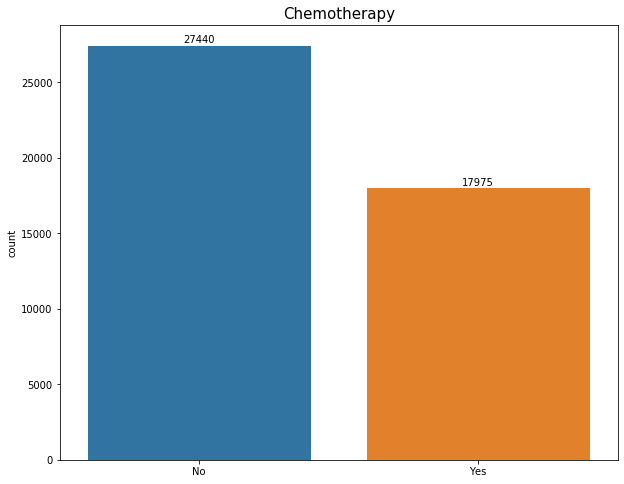

In [109]:
ax = sns.countplot(data = df, x = 'CHEMOTHERAPY2')
ax.set_title('Chemotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [110]:
df['TARGETED2'].value_counts()

False    41236
True      4179
Name: TARGETED2, dtype: int64

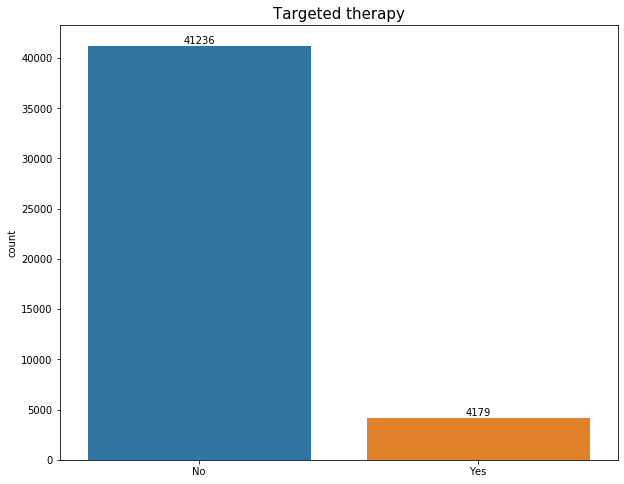

In [112]:
ax = sns.countplot(data = df, x = 'TARGETED2')
ax.set_title('Targeted therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [113]:
df['CHEM_TARG2'].value_counts()

False    39894
True      5521
Name: CHEM_TARG2, dtype: int64

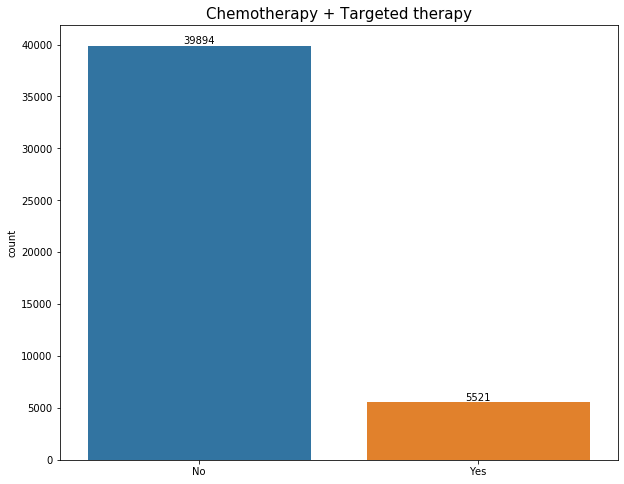

In [115]:
ax = sns.countplot(data = df, x = 'CHEM_TARG2')
ax.set_title('Chemotherapy + Targeted therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [104]:
df['CHEM_RADIO2'].value_counts()

False    44622
True       793
Name: CHEM_RADIO2, dtype: int64

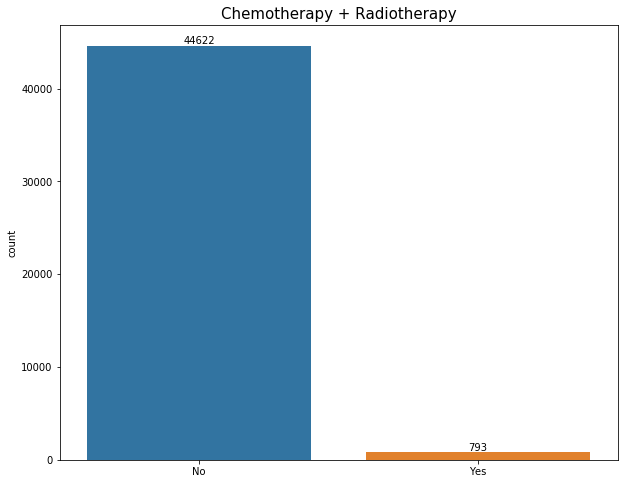

In [116]:
ax = sns.countplot(data = df, x = 'CHEM_RADIO2')
ax.set_title('Chemotherapy + Radiotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [124]:
df['TARG_RADIO2'].value_counts()

False    45403
True        12
Name: TARG_RADIO2, dtype: int64

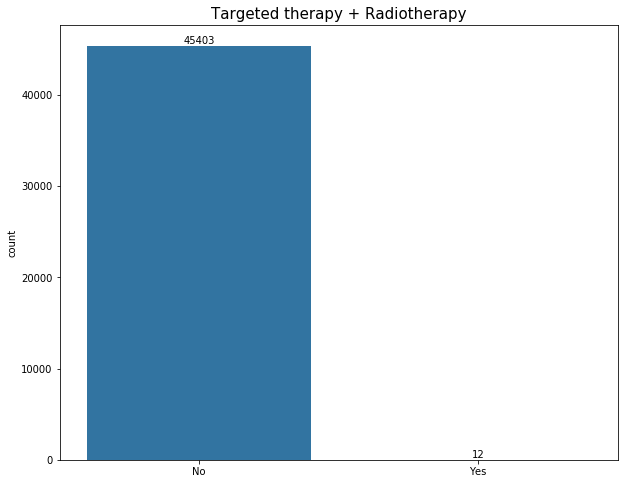

In [125]:
ax = sns.countplot(data = df, x = 'TARG_RADIO2')
ax.set_title('Targeted therapy + Radiotherapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [126]:
df['HORMONE2'].value_counts()

False    44838
True       577
Name: HORMONE2, dtype: int64

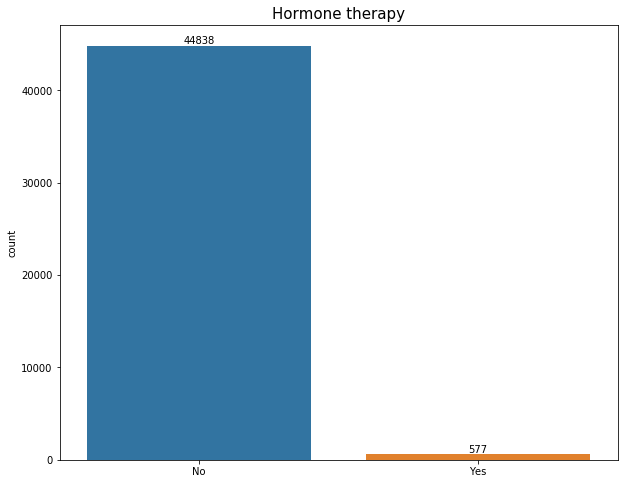

In [127]:
ax = sns.countplot(data = df, x = 'HORMONE2')
ax.set_title('Hormone therapy', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [128]:
df['OTHER2'].value_counts()

False    45167
True       248
Name: OTHER2, dtype: int64

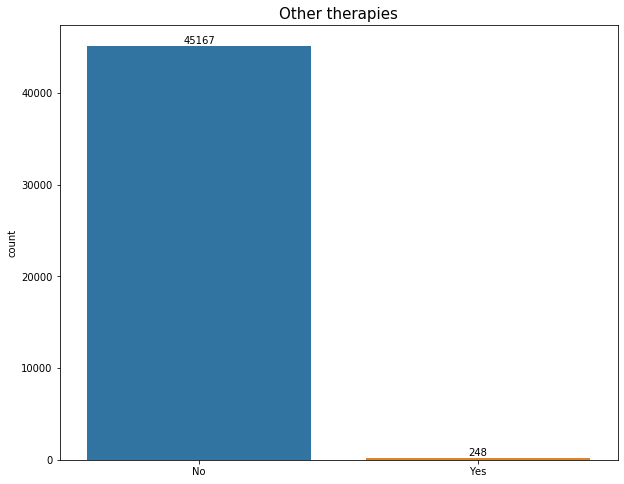

In [129]:
ax = sns.countplot(data = df, x = 'OTHER2')
ax.set_title('Other therapies', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [130]:
df = df.drop(['CHEMOTHERAPY', 'TARGETED', 'CHEM_TARG', 'CHEM_RADIO',
       'TARG_RADIO', 'HORMONE', 'OTHER'], axis = 1)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,HEIGHT,WEIGHT,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,DIAG_TO_TREAT,DIAG_TO_TREAT_DAYS,DIAG_TO_TREAT_DAYS_MEDIAN,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10002223.0,10003950.0,nan,2013-03-19,N,nan,10001000.0,NaN,1.80,67.75,20.910494,False,False,False,False,False,False,False,12 days,12.0,472.5,False,False,False,False,False,False,False,False,False
1,10001000,F,810001000,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,2013-03-07,10001000.0,810001000.0,10005351.0,10009879.0,nan,2015-09-26,N,N,10001000.0,NaN,1.80,67.75,20.910494,False,False,False,False,False,False,False,933 days,933.0,472.5,False,False,False,False,False,False,False,False,False
2,10001128,F,810001128,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,2014-10-23,NaN,NaN,NaN,NaN,nan,NaT,nan,nan,NaN,NaN,1.68,74.00,26.218821,False,False,False,False,False,False,False,NaT,NaN,175.0,False,False,False,False,False,False,False,False,False
3,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10005354.0,10011398.0,Palliative,2015-11-23,N,nan,10001482.0,BORTEZOMIB,1.63,90.15,33.930521,False,False,True,False,False,False,False,684 days,684.0,596.5,False,False,True,True,False,False,False,False,False
4,10001482,F,810001482,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,2014-01-08,10001482.0,810001482.0,10010150.0,10007977.0,nan,2014-07-18,N,nan,10001482.0,DOCETAXEL,1.63,90.15,33.930521,False,False,True,False,False,False,False,191 days,191.0,596.5,False,False,True,True,False,False,False,False,False


In [140]:
df[['PATIENTID', 'BENCHMARK_GROUP','CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2',
       'TARG_RADIO2', 'HORMONE2', 'OTHER2']].dropna().head(10)

,PATIENTID,BENCHMARK_GROUP,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
3,10001482,BORTEZOMIB,True,True,False,False,False,False,False
4,10001482,DOCETAXEL,True,True,False,False,False,False,False
6,10001482,BENDAMUSTINE,True,True,False,False,False,False,False
14,10003167,LENALIDOMIDE,True,True,False,False,False,False,False
15,10003167,CISPLATIN + VINORELBINE,True,True,False,False,False,False,False
16,10003167,BENDAMUSTINE,True,True,False,False,False,False,False
21,10005842,VISMODEGIB,False,True,False,False,False,False,False
23,10005842,VISMODEGIB,False,True,False,False,False,False,False
24,10006477,ZOLEDRONIC ACID,False,False,False,False,False,False,True
47,10016934,FLUOROURACIL,True,False,False,False,False,False,False


In [151]:
without_treatment = df[(df['CHEMOTHERAPY2']  == False) & (df['TARGETED2']  == False) & (df['CHEM_TARG2']  == False) & 
   (df['CHEM_RADIO2']  == False) & (df['TARG_RADIO2']  == False) & (df['HORMONE2']  == False) & (df['OTHER2']  == False)]
without_treatment.shape

(26404, 96)

In [155]:
without_treatment['BENCHMARK_GROUP'].value_counts(dropna=False)

NaN    26404
Name: BENCHMARK_GROUP, dtype: int64

In [156]:
df.isna().sum()

PATIENTID                        0
SEX                              0
LINKNUMBER                       0
ETHNICITY                     2663
NEWVITALSTATUS                   0
NUMBER_TUMOURS                   0
C180                             0
C181                             0
C182                             0
C183                             0
C184                             0
C185                             0
C186                             0
C187                             0
C188                             0
BEH_BENIGN                       0
BEH_MALIG                        0
BEH_MICINV                       0
BEH_INSITU                       0
BEH_UNCERT                       0
T0                               0
T1                               0
T2                               0
T3                               0
T4                               0
N0                               0
N1                               0
N2                               0
N3                  

In [157]:
df.shape

(45415, 96)

In [89]:
# df = df.dropna(subset=['BENCHMARK_GROUP'])
# df.shape

In [90]:
# columns_selected = ['PATIENTID', 'SEX', 'ETHNICITY', 'NEWVITALSTATUS',
#        'NUMBER_TUMOURS', 'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 
#        'SC508', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 
#        'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
#        'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
#        'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
#        'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS',
#        'PR_POS', 'HER_POS', 'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
#        'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3','ECOG4', 
#        'ACE0', 'ACE1', 'ACE2', 'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 
#        'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
#        'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
#        'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING', 
#        'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2',
#        'CHEM_RADIO2', 'TARG_RADIO2', 'CHEM_RADIO_TARG2', 'HORM_TARG2', 'HORMONE2', 'OTHER2']

In [158]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185',
       'C186', 'C187', 'C188', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV',
       'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1',
       'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT',
       'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2',
       'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAGNOSISDATEBEST',
       'MERGED_PATIENT_ID_x', 'LINK_NUMBER', 'MERGED_TUMOUR_ID',
       'MERGED_REGIMEN_ID', 'INTENT_OF_TREATMENT', 'START_DATE_OF_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID_y',
       'BENCHMARK_GROUP', 'HEIGHT', 'WEIGH

In [159]:
columns_selected = ['PATIENTID', 'SEX', 'ETHNICITY', 'NEWVITALSTATUS',
       'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 
       'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3','ECOG4', 
       'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING', 
       'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 
       'TARG_RADIO2', 'HORMONE2', 'OTHER2']

In [160]:
df = df[columns_selected]
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10001000,F,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001128,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001482,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
4,10001482,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False


In [161]:
df.shape

(45415, 80)

In [162]:
df = df.drop_duplicates()
df.shape

(33690, 80)

In [163]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].sort_values(by = 'PATIENTID').head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2


In [164]:
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001128,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001482,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
7,10001901,M,NaN,A,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,10002351,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [166]:
df.to_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')